## Correlation between news and stock movement

Load sentiment.csv and stock_data.csv datasets
- merge together with the same date

In [7]:
import pandas as pd

# Read the datasets
df_news = pd.read_csv('../Data/sentiment.csv')
df_stock = pd.read_csv('../Data/stock_data.csv')

In [ ]:
# Se

In [8]:
df_news.head()

,Date,headline,neg,neu,pos,compound,Sentiment,stock
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2,2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


Set stock multiIndex with Date

In [9]:
# Set 'Date' and 'stock' column as part of the index
df_stock = df_stock.set_index('Date')
df_stock = df_stock.set_index('stock', append=True)
df_news = df_news.set_index('Date')
df_news = df_news.set_index('stock', append=True)

In [23]:
# Align the datasets by Date and Stock
aligned_data = pd.merge(df_stock, df_news, 
                        left_index=True, 
                        right_index=True, 
                        how='inner')


In [11]:
# Check the result with the first five rows
aligned_data.head()

Open     High      Low    Close        Volume    SMA_20  \
Date       stock                                                               
2020-06-10 AAPL   85.6397  87.3306  85.1952  86.8561  1.692479e+08  88.15497   
           AAPL   85.6397  87.3306  85.1952  86.8561  1.692479e+08  88.15497   
           AAPL   85.6397  87.3306  85.1952  86.8561  1.692479e+08  88.15497   
           AAPL   85.6397  87.3306  85.1952  86.8561  1.692479e+08  88.15497   
           AAPL   85.6397  87.3306  85.1952  86.8561  1.692479e+08  88.15497   

                     EMA_20     RSI_14      MACD  MACD_Signal  MACD_Hist  \
Date       stock                                                           
2020-06-10 AAPL   88.354695  41.642422 -3.338606    -3.543759   0.205152   
           AAPL   88.354695  41.642422 -3.338606    -3.543759   0.205152   
           AAPL   88.354695  41.642422 -3.338606    -3.543759   0.205152   
           AAPL   88.354695  41.642422 -3.338606    -3.543759   0.205152   
           AAPL   88.354695  41.642422 -3.338606    -3.543759   0.205152   

                  Daily_Return  Cumulative_Return  \
Date       stock                                    
2020-06-10 AAPL        0.05041           0.668484   
           AAPL        0.05041           0.668484   
           AAPL        0.05041           0.668484   
           AAPL        0.05041           0.668484   
           AAPL        0.05041           0.668484   

                                                           headline    neg  \
Date       stock                                                             
2020-06-10 AAPL   Tech Stocks And FAANGS Strong Again To Start D...  0.000   
           AAPL       10 Biggest Price Target Changes For Wednesday  0.208   
           AAPL   Benzinga Pro's Top 5 Stocks To Watch For Wed.,...  0.208   
           AAPL   Deutsche Bank Maintains Buy on Apple, Raises P...  0.208   
           AAPL   Apple To Let Users Trade In Their Mac Computer...  0.208   

                    neu  pos  compound Sentiment  
Date       stock                                  
2020-06-10 AAPL   1.000  0.0    0.0000   Neutral  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative

In [14]:
# Check size
aligned_data.shape

(6703, 19)

In [13]:
# Check missing
aligned_data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
SMA_20               0
EMA_20               0
RSI_14               0
MACD                 0
MACD_Signal          0
MACD_Hist            0
Daily_Return         0
Cumulative_Return    0
headline             0
neg                  0
neu                  0
pos                  0
compound             0
Sentiment            0
dtype: int64

In [16]:
# Check the data types
aligned_data.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
SMA_20               float64
EMA_20               float64
RSI_14               float64
MACD                 float64
MACD_Signal          float64
MACD_Hist            float64
Daily_Return         float64
Cumulative_Return    float64
headline              object
neg                  float64
neu                  float64
pos                  float64
compound             float64
Sentiment             object
dtype: object

Aggregate Sentiments: 
- Compute average daily sentiment scores if multiple articles appear on the same day.

In [31]:
# Ensure 'Date' is in datetime format if not already
aligned_data.index = pd.MultiIndex.from_frame(aligned_data.index.to_frame().assign(Date=pd.to_datetime(aligned_data.index.get_level_values('Date'))))

# Calculate average daily sentiment scores
sentiment_cols = ['neg', 'neu', 'pos', 'compound']
daily_sentiment = aligned_data.groupby(level=['Date', 'stock'])[sentiment_cols].mean()

# Reset index for merging purposes
daily_sentiment = daily_sentiment.reset_index()

In [32]:
daily_sentiment

,Date,stock,neg,neu,pos,compound
0,2011-03-03,NVDA,0.000000,1.000000,0.000000,0.000000
1,2011-03-07,NVDA,0.000000,0.808500,0.191500,0.296000
2,2011-03-08,NVDA,0.058750,0.879500,0.061750,-0.020750
3,2011-03-09,NVDA,0.135000,0.865000,0.000000,-0.175567
4,2011-03-10,NVDA,0.065000,0.935000,0.000000,-0.064000
...,...,...,...,...,...,...
1791,2020-06-10,AAPL,0.173333,0.826667,0.000000,-0.227667
1792,2020-06-10,AMZN,0.000000,1.000000,0.000000,0.000000
1793,2020-06-10,GOOG,0.000000,0.889000,0.111000,0.223500
1794,2020-06-10,NVDA,0.123333,0.827333,0.049333,-0.077733


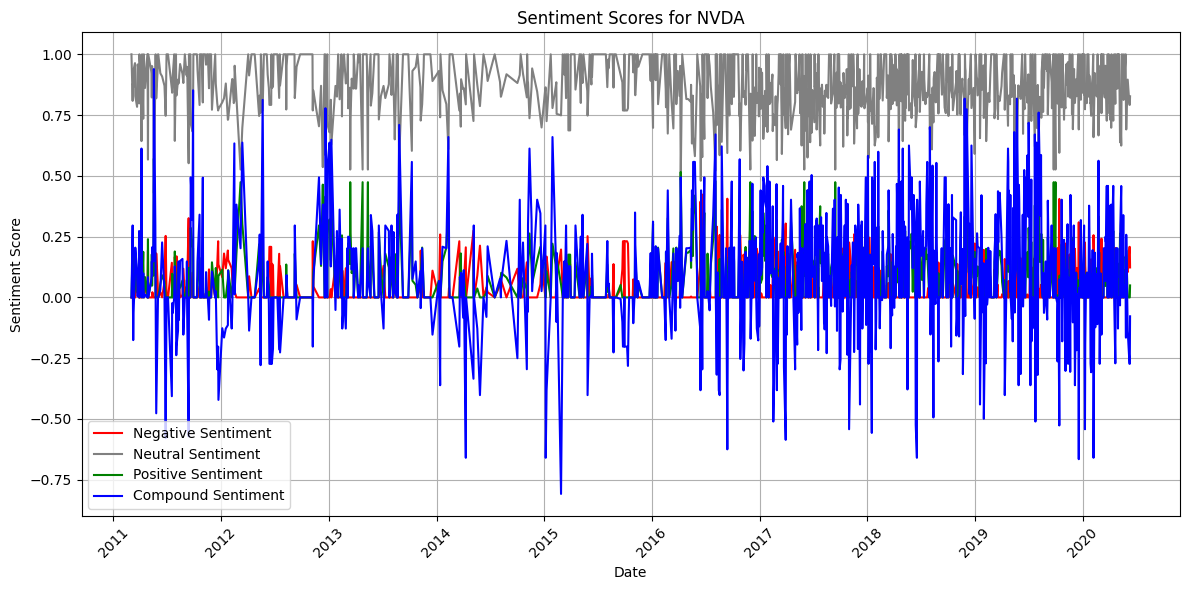

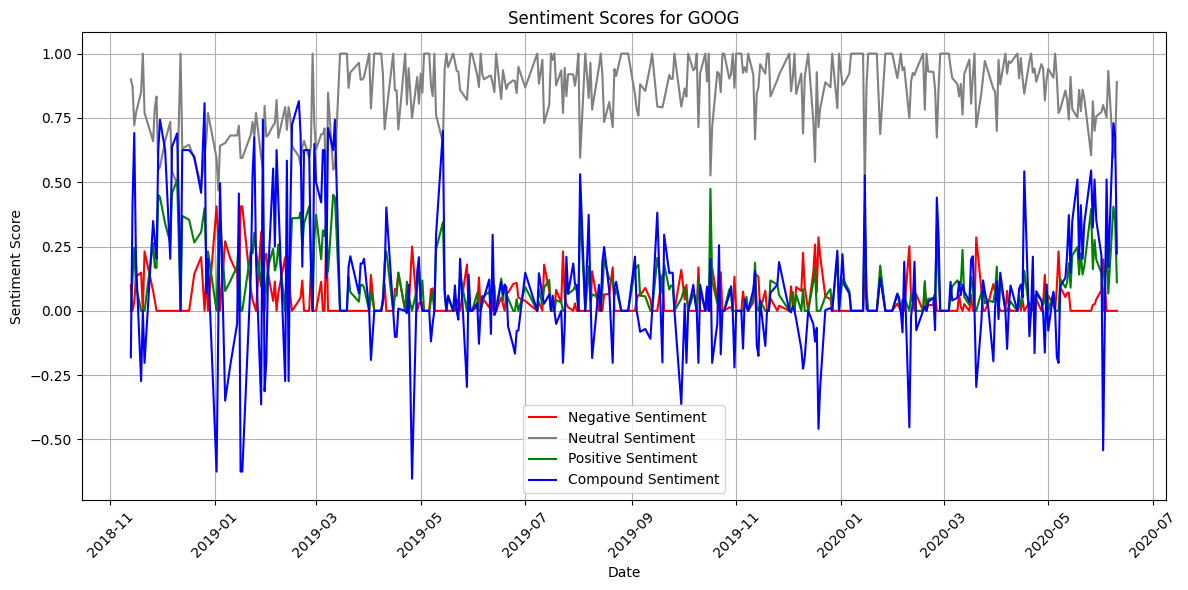

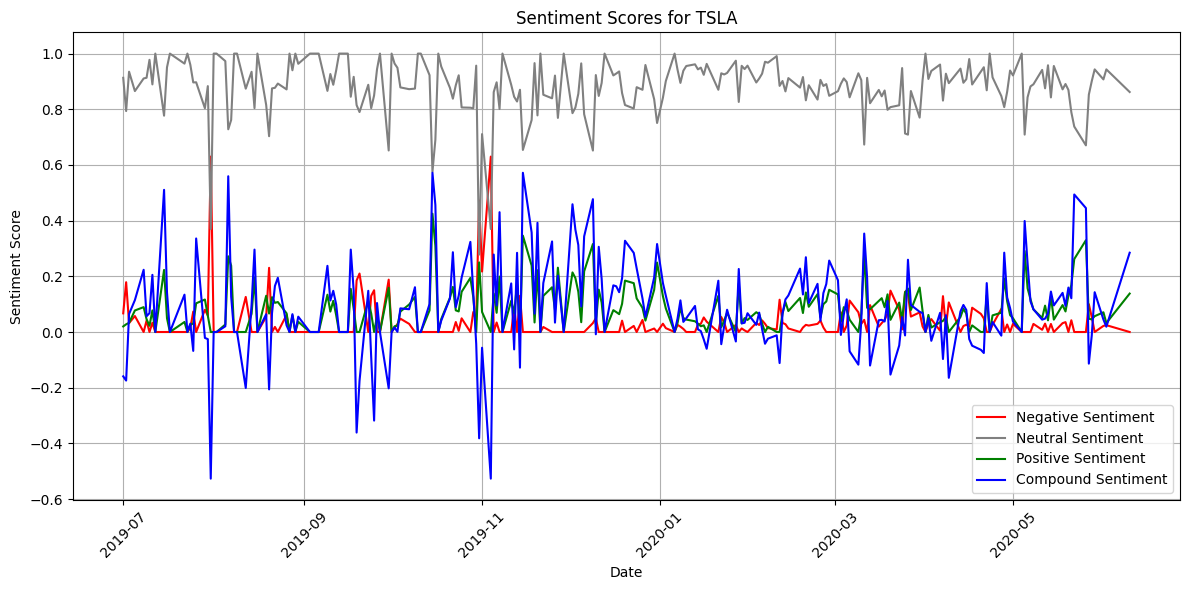

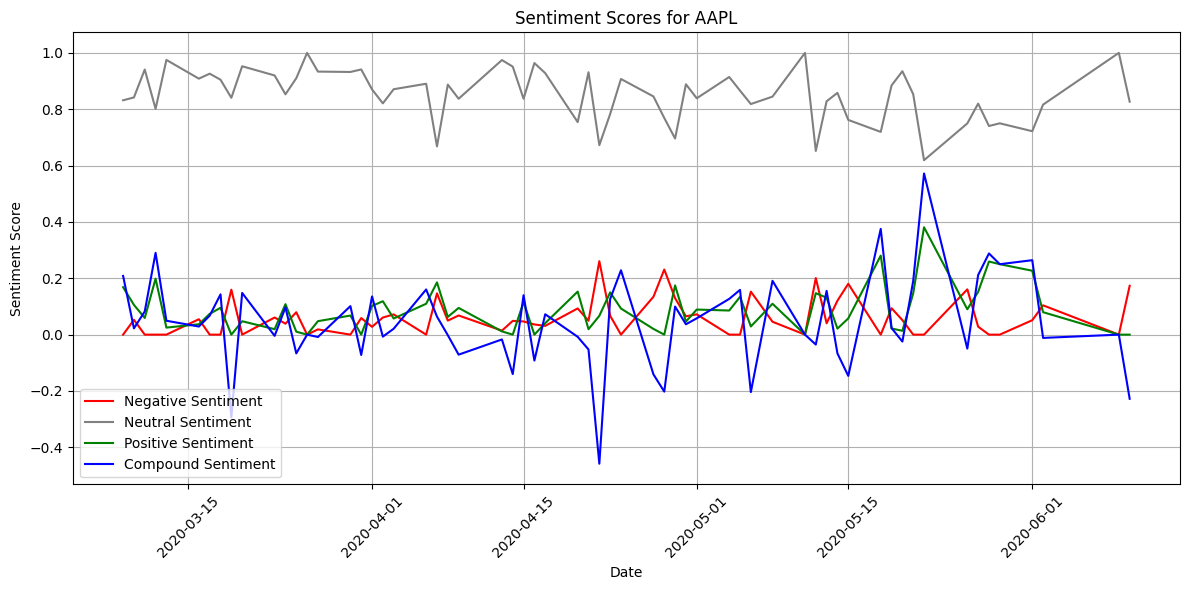

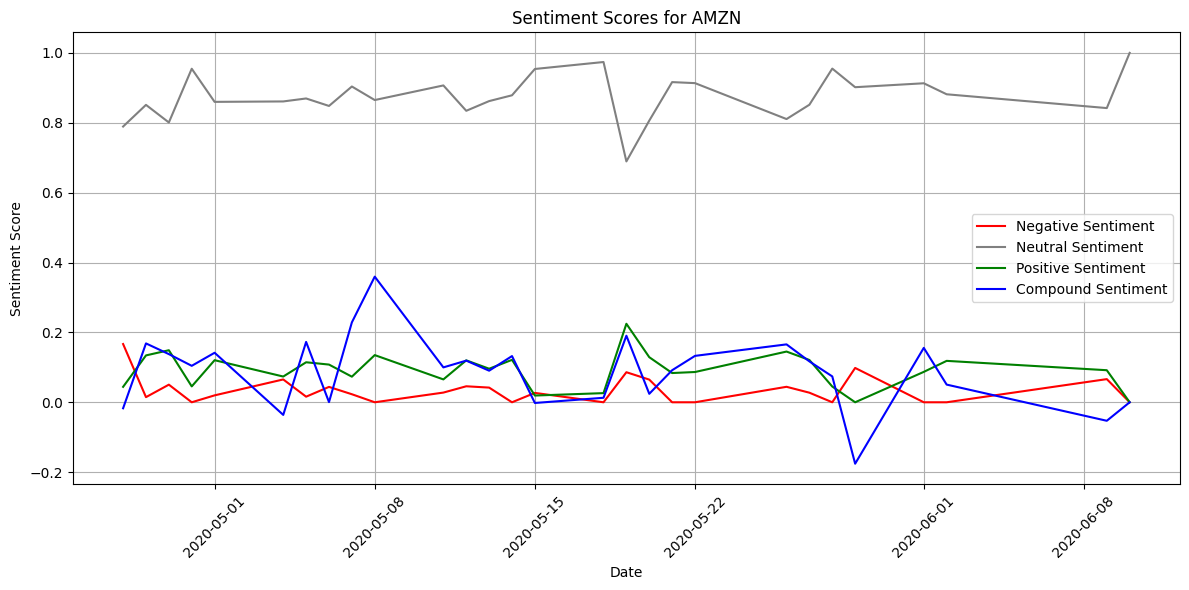

In [34]:
# Plot sentiment scores for each stock
from matplotlib import pyplot as plt
stocks = daily_sentiment['stock'].unique()

for stock in stocks:
    stock_data = daily_sentiment[daily_sentiment['stock'] == stock]
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['neg'], label='Negative Sentiment', color='red')
    plt.plot(stock_data['Date'], stock_data['neu'], label='Neutral Sentiment', color='grey')
    plt.plot(stock_data['Date'], stock_data['pos'], label='Positive Sentiment', color='green')
    plt.plot(stock_data['Date'], stock_data['compound'], label='Compound Sentiment', color='blue')
    
    plt.title(f'Sentiment Scores for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
# Step 2: Group by Date and Stock, then compute the average sentiment score
aggregated_sentiment = aligned_data.groupby(['Date', 'stock'])['Sentiment_Score'].mean().reset_index()

In [26]:
aggregated_sentiment

,Date,stock,Sentiment_Score
0,2011-03-03,NVDA,NaN
1,2011-03-07,NVDA,NaN
2,2011-03-08,NVDA,NaN
3,2011-03-09,NVDA,NaN
4,2011-03-10,NVDA,NaN
...,...,...,...
1791,2020-06-10,AAPL,NaN
1792,2020-06-10,AMZN,NaN
1793,2020-06-10,GOOG,NaN
1794,2020-06-10,NVDA,NaN


In [20]:
# Merge the aggregated sentiment back to the aligned_data if needed
aligned_data = aligned_data.drop(columns=['Sentiment'])
aligned_data = pd.merge(aligned_data, aggregated_sentiment, on=['Date', 'stock'], how='left')

# Check the updated data
aligned_data.head()

,Date,stock,Open,High,Low,Close,Volume,SMA_20,EMA_20,RSI_14,...,MACD_Signal,MACD_Hist,Daily_Return,Cumulative_Return,headline,neg,neu,pos,compound,Sentiment
0,2020-06-10,AAPL,85.6397,87.3306,85.1952,86.8561,1.692479e+08,88.15497,88.354695,41.642422,...,-3.543759,0.205152,0.05041,0.668484,Tech Stocks And FAANGS Strong Again To Start D...,0.000,1.000,0.0,0.0000,Negative
1,2020-06-10,AAPL,85.6397,87.3306,85.1952,86.8561,1.692479e+08,88.15497,88.354695,41.642422,...,-3.543759,0.205152,0.05041,0.668484,10 Biggest Price Target Changes For Wednesday,0.208,0.792,0.0,-0.2732,Negative
2,2020-06-10,AAPL,85.6397,87.3306,85.1952,86.8561,1.692479e+08,88.15497,88.354695,41.642422,...,-3.543759,0.205152,0.05041,0.668484,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",0.208,0.792,0.0,-0.2732,Negative
3,2020-06-10,AAPL,85.6397,87.3306,85.1952,86.8561,1.692479e+08,88.15497,88.354695,41.642422,...,-3.543759,0.205152,0.05041,0.668484,"Deutsche Bank Maintains Buy on Apple, Raises P...",0.208,0.792,0.0,-0.2732,Negative
4,2020-06-10,AAPL,85.6397,87.3306,85.1952,86.8561,1.692479e+08,88.15497,88.354695,41.642422,...,-3.543759,0.205152,0.05041,0.668484,Apple To Let Users Trade In Their Mac Computer...,0.208,0.792,0.0,-0.2732,Negative
